In [80]:
import numpy as np 
import pandas as pd
from pathlib import Path

In [81]:
from pathlib import Path
import urllib.request
import pandas as pd

drive_link = "https://drive.google.com/file/d/17bqqiJZ7JCXPt0EwseFBPZbBIuV7-YcG/view"
file_id = drive_link.split("=")[-1]  
download_url = f"https://drive.google.com/u/0/uc?id=17bqqiJZ7JCXPt0EwseFBPZbBIuV7-YcG&export=download"
local_file = Path("data.csv")
urllib.request.urlretrieve(download_url, local_file)
Machine_temp_failure_missing= pd.read_csv(local_file)
print(Machine_temp_failure_missing.head())


          timestamp      value
0  02-12-2013 21:15  73.967322
1  02-12-2013 21:20  74.935882
2  02-12-2013 21:25  76.124162
3  02-12-2013 21:30  78.140707
4  02-12-2013 21:35  79.329836


In [82]:
empty_rows = Machine_temp_failure_missing.isnull().all(axis=1).sum()
print(empty_rows) # no of empty rows

0


In [83]:
Machine_temp_failure_missing["value"].describe() # to tell mean , median , max , min 

count    21410.000000
mean        85.968188
std         13.553070
min          2.084721
25%         83.082867
50%         89.251290
75%         93.910748
max        108.510543
Name: value, dtype: float64

In [84]:
Machine_temp_failure_missing["temperature"]=Machine_temp_failure_missing['value'] # rename value column to temperature
Machine_temp_failure_missing.drop('value',axis=1,inplace=True)


In [85]:
Machine_temp_failure_missing

,timestamp,temperature
0,02-12-2013 21:15,73.967322
1,02-12-2013 21:20,74.935882
2,02-12-2013 21:25,76.124162
3,02-12-2013 21:30,78.140707
4,02-12-2013 21:35,79.329836
...,...,...
22690,19-02-2014 15:05,98.185415
22691,19-02-2014 15:10,97.804168
22692,19-02-2014 15:15,97.135468
22693,19-02-2014 15:20,98.056852


In [86]:
for i in range(22694):
   Machine_temp_failure_missing.loc[i,"delta_temperature"]=Machine_temp_failure_missing.loc[i+1,"temperature"]-df.loc[i,"temperature"]
Machine_temp_failure_missing.head()  # created new column delta_temperature 

,timestamp,temperature,delta_temperature
0,02-12-2013 21:15,73.967322,0.968560
1,02-12-2013 21:20,74.935882,1.188280
2,02-12-2013 21:25,76.124162,2.016546
3,02-12-2013 21:30,78.140707,1.189128
4,02-12-2013 21:35,79.329836,-0.619417


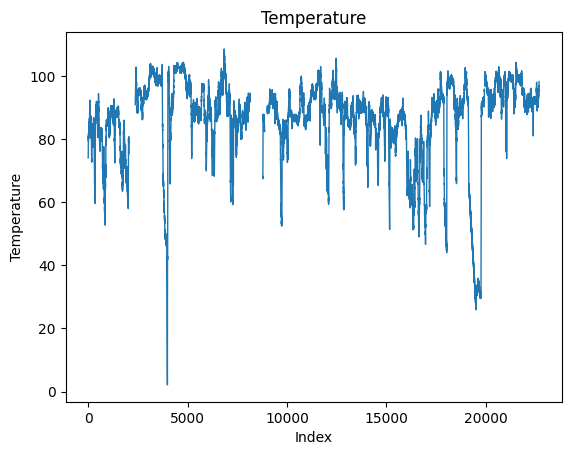

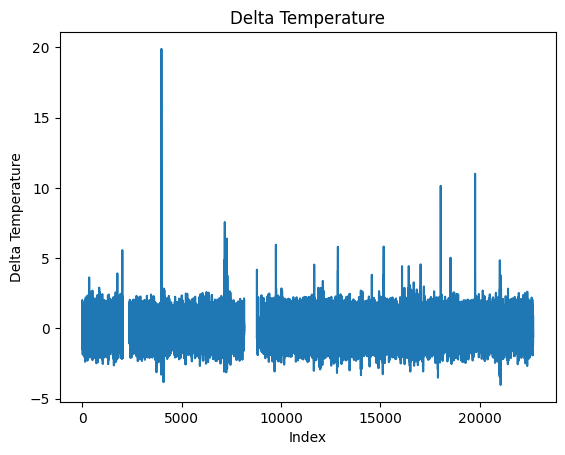

In [87]:
import matplotlib.pyplot as plt
plt.plot(Machine_temp_failure_missing.index, Machine_temp_failure_missing['temperature'],linewidth=1)
plt.title('Temperature')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.show()

plt.plot(Machine_temp_failure_missing.index, Machine_temp_failure_missing['delta_temperature'])
plt.title('Delta Temperature')
plt.xlabel('Index')
plt.ylabel('Delta Temperature')
plt.show()

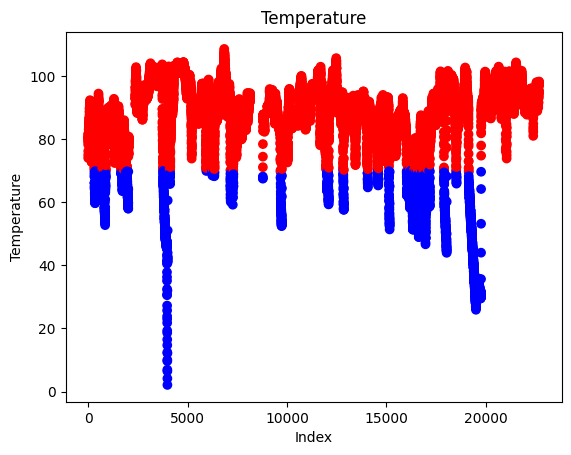

In [88]:
plt.scatter(Machine_temp_failure_missing.index, Machine_temp_failure_missing['temperature'],c=Machine_temp_failure_missing['temperature'].apply(lambda x: 'red' if x > 70.00 else 'blue'))
plt.title('Temperature')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.show()

In [89]:
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
import numpy as np
import sklearn
import statsmodels as sm

def read_dataset(folder, file, date_col=None):
    '''
    folder: is a Path object
    file: the CSV filename in that Path object. 
    date_col: specify a date_col to use as index_col 
    
    returns: a pandas DataFrame with a DatetimeIndex
    '''
    df = pd.read_csv(folder / file, 
                     index_col=date_col, 
                     parse_dates=[date_col])
    return df

In [90]:
def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None):
    '''	
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''    
    Machine_temp_failure_missing = df2.rename(columns={col: 'missing'})
    
    columns = Machine_temp_failure_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)
    
    # subplots_size = df2.shape[1]
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = title 
    
    df1[col].plot(ax=ax[0], figsize=(10, 16))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)    
    
    for i, colname in enumerate(columns):
        Machine_temp_failure_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname)

    plt.show()


In [91]:
import numpy as np
def rmse_score(df1, df2, col=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data

    returns: a list of scores
    '''
    Machine_temp_failure_missing = df2.rename(columns={col: 'missing'})
    columns = Machine_temp_failure_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - Machine_temp_failure_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores


In [92]:
drive_link = "https://drive.google.com/file/d/1kulRVMpepw903zqZAIETRHR3CKCw9hCT/view?usp=sharing"
file_id = drive_link.split("=")[-1]  
download_url = f"https://drive.google.com/u/0/uc?id=1kulRVMpepw903zqZAIETRHR3CKCw9hCT&export=download"
local_file = Path("data.csv")
urllib.request.urlretrieve(download_url, local_file)
Machine_temp_failure_original=pd.read_csv(local_file)
print(df.head())

          timestamp  temperature
0  02-12-2013 21:15    73.967322
1  02-12-2013 21:20    74.935882
2  02-12-2013 21:25    76.124162
3  02-12-2013 21:30    78.140707
4  02-12-2013 21:35    79.329836


In [98]:
Machine_temp_failure_missing['ffill'] = Machine_temp_failure_missing['temperature'].fillna(method='ffill')
Machine_temp_failure_missing['bfill'] = Machine_temp_failure_missing['temperature'].fillna(method='bfill')
Machine_temp_failure_missing['mean'] = Machine_temp_failure_missing['temperature'].fillna(Machine_temp_failure_missing['temperature'].mean())

In [102]:
import numpy as np
def rmse_score(df1, df2, col=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data

    returns: a list of scores
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:,'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores
rmse_score1 = rmse_score(Machine_temp_failure_original, 
                    Machine_temp_failure_missing, 
                    'temperature')


KeyError: ignored